In [2]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [4]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [5]:
df.head()

,Review,Stars,Date,Country,verified,corpus
0,✅ Trip Verified | Flight mainly let down by ...,5,2025-03-19,United Kingdom,True,flight mainly let disagreeable flight attendan...
1,✅ Trip Verified | Another awful experience b...,7,2025-03-16,United States,True,another awful experience british airway flight...
2,"✅ Trip Verified | The service was rude, full...",1,2025-03-16,United States,True,service rude full attitude food poorly service...
3,✅ Trip Verified | This flight was a joke. Th...,3,2025-03-16,United States,True,flight joke four people business class includi...
4,✅ Trip Verified | This time British Airways ...,1,2025-03-07,United Kingdom,True,time british airway managed get everything rig...


In [ ]:
df["Stars"] = pd.to_numeric(df["Stars"], errors="coerce")  
df["Stars"].mean()  


np.float64(4.660965024253255)

Text(0.5, 0.98, 'Counts for each ratings')

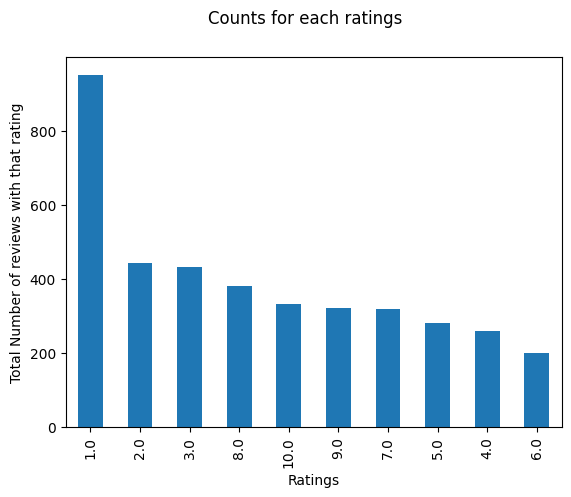

In [43]:
df.Stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

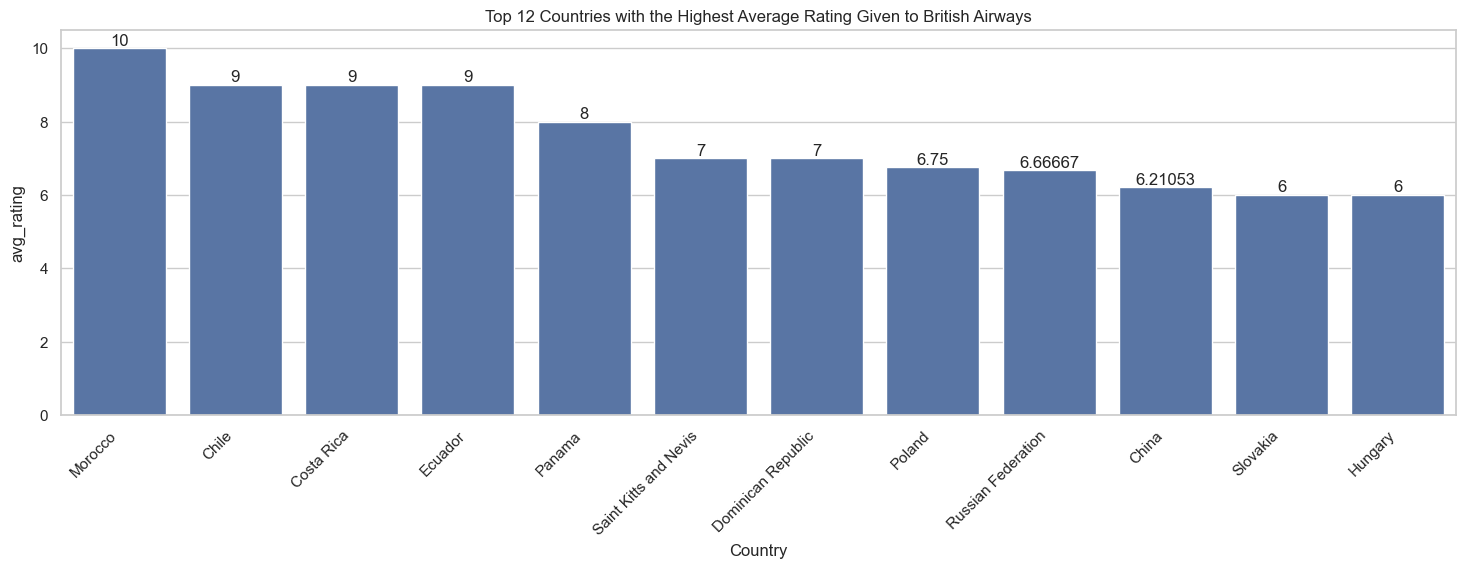

In [80]:

df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')


df_country_rating = pd.DataFrame(df.groupby('Country')['Stars'].mean().sort_values(ascending=False)).reset_index()

# Rename 'Stars' to 'avg_rating'
df_country_rating.rename(columns={'Stars': 'avg_rating'}, inplace=True)

# Create the plot
fig, ax = plt.subplots(figsize=(18, 5))
ax1 = sns.barplot(x='Country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])

# Set the title of the plot
ax.set_title("Top 12 Countries with the Highest Average Rating Given to British Airways")

# Display the plot
plt.xticks(rotation=45, ha='right')  
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


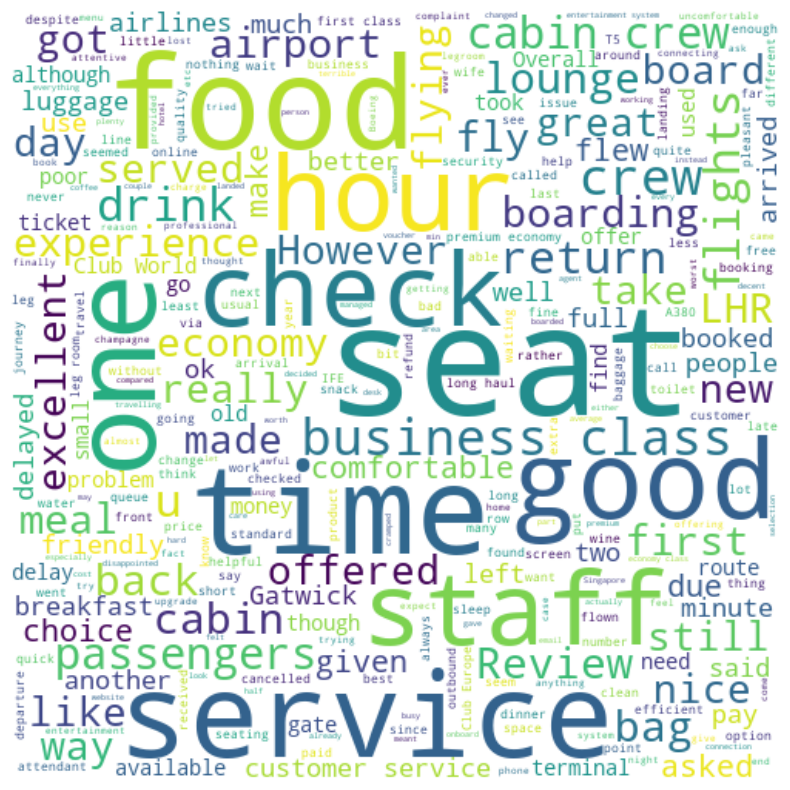

In [22]:
import nltk
from nltk.corpus import stopwords


nltk.download("stopwords")


reviews = " ".join(df["Review"])

plt.figure(figsize=(20,10))


custom_stopwords = set(stopwords.words("english"))
custom_stopwords.update(["ba", "flight", "british", "airway", "airline", "plane", "told", "also", 
                         "passenger", "london", "heathrow", "aircraft", "could", "even", "would", "airways", "Trip Verified", "Verified", "get", "Trip"])


wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=300, 
                      stopwords=custom_stopwords, background_color="white").generate(reviews)


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_16240\968684491.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette={"Positive": "green", "Neutral": "gray", "Negative": "red"})


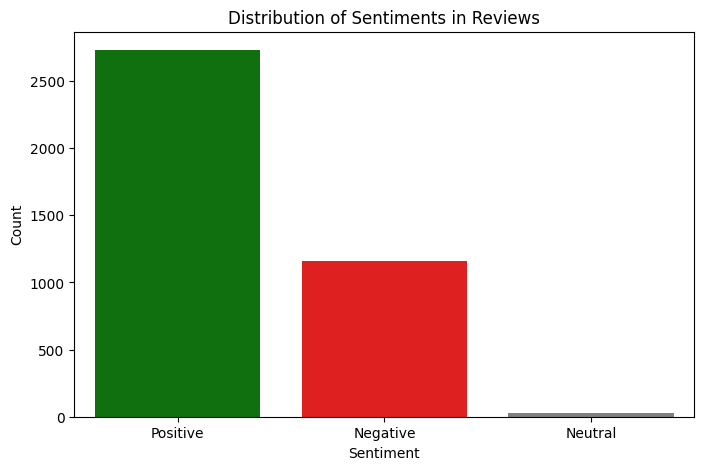

In [ ]:
from textblob import TextBlob
import seaborn as sns


def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity 
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


df["Sentiment"] = df["corpus"].apply(get_sentiment)


plt.figure(figsize=(8,5))
sns.countplot(x="Sentiment", data=df, palette={"Positive": "green", "Neutral": "gray", "Negative": "red"})
plt.title("Distribution of Sentiments in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [71]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",
                                           "heathrow","plane","lhr","review","I","The","BA","","Verified","|","-","British","✅","Airways","London",
                                           "Trip","good","We","Heathrow","flight.","just","did","flights","fly","hours","Club","told",
                                           "Review","like","This","hour","new","It","really","They","got","long"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

Text(0.5, 0, '')

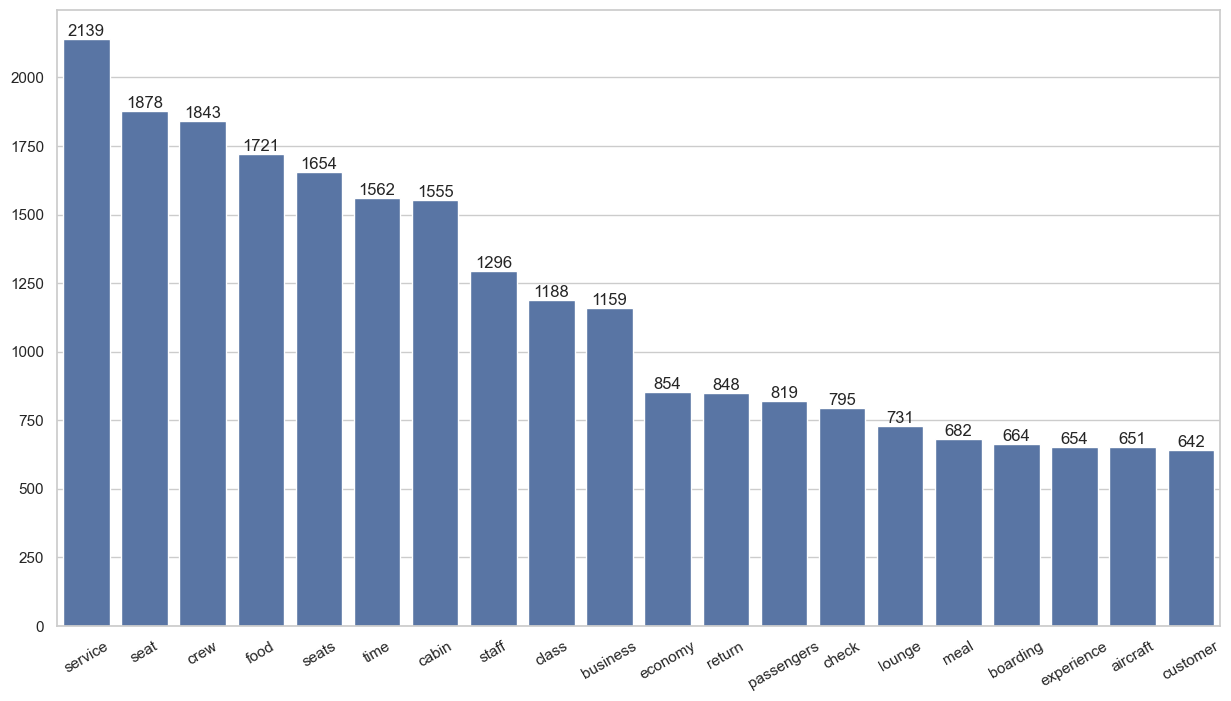

In [77]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.xlabel("")